# Project: IMDb Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This is IMDb dataset cleaned from [kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata), This data set contains information
about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.

We're gonna investigate it, I'm going to use the adjusted values for the revenue and the budgets so we can better compare performance from different years.

First will clean up data then explore the profits by genre and actors who have been part of the most profitable films, then dive deeper about the changes over time and possible causes.

**Note:** The adjusted revenue filed is not complete and in this file I've used a lib to adjust for inflation and get more data points, but it turns out the mean (average) values used in the previous file was representative, but had to double check.\
Will attach the old file (haven't cleaned the markdown, but did all the visualization and analysis).

## Importing Liberaries

In [1]:
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib.ticker as mtick, plotly.express as px
#from plotly import graph_objects as go #added to check jupyter instead of express, according to their docs
import cpi

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#Loading data and checking checking the structure
md = pd.read_csv('tmdb-movies.csv', encoding='utf8');
md.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Adjusting ourselves using CPI https://github.com/datadesk/cpi

Keep in mind this hasn't been updated for years, just using it to keep everything to one standard

In [4]:
md

id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Furious 7   
...                             ...   
10861            The Endless Summer   
10862                    Grand Prix   
10863           Beregis Avtomobilya   
10864        What's Up, Tiger Lily?   
10865      Manos: The Hands of Fate   

                                                    cast  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2      Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3      Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4      Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
...                                                  ...   
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...   

                                                homepage            director  \
0                          http://www.jurassicworld.com/     Colin Trevorrow   
1                            http://www.madmaxmovie.com/       George Miller   
2         http://www.thedivergentseries.movie/#insurgent    Robert Schwentke   
3      http://www.starwars.com/films/star-wars-episod...         J.J. Abrams   
4                               http://www.furious7.com/           James Wan   
...                                                  ...                 ...   
10861                                                NaN         Bruce Brown   
10862                                                NaN  John Frankenheimer   
10863                                                NaN      Eldar Ryazanov   
10864                                                NaN         Woody Allen   
10865                                                NaN    Harold P. Warren   

                                                 tagline  ...  \
0                                      The park is open.  ...   
1                                     What a Lovely Day.  ...   
2                             One Choice Can Destroy You  ...   
3                          Every generation has a story.  ...   
4                                    Vengeance Hits Home  ...   
...                                                  ...  ...   
10861                                                NaN  ...   
10862  Cinerama sweeps YOU into a drama of speed and ...  ...   
10863                                                NaN  ...   
10864                          WOODY ALLEN STRIKES BACK!  ...   
10865       It's Shocking! It's Beyond Your Imagination!  ...   

                                                overview runtime  \
0      Twenty-two years after the events of Jurassic ...     124   
1      An apocalyptic story set in the furthest reach...     120   
2      Beatrice Prior must confront her inner demons ...     119   
3      Thirty years after defeating the Galactic E

In [5]:
#Editing md

md['revenue_adj'] = md.apply(lambda x: cpi.inflate(x.revenue, x.release_year), axis=1)
md['budget_adj'] = md.apply(lambda x: cpi.inflate(x.budget, x.release_year), axis=1)

#Creating a dataframe of just the needed columns
md_time01 = md.filter(items=['release_year', 'revenue_adj', 'budget_adj']).sort_values(by='revenue_adj', ascending=False)
#removing rows that have missing data and zero data points.
md_time01 = md_time01[(md_time01[['revenue_adj','budget_adj']] != 0).all(axis=1)] # Works too
#md_time01 = md_time01[md_time01 > 0].dropna()

#md_time_test = md_time01 # was used for testing changes in count



We can see a lot of empty records in fields like homepage and production companies.

A lot of these columns are needed for my usage so I'm just going to drop them.

In [6]:
#removing unneeded columns
md.drop(columns=['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'keywords', 'production_companies', 'vote_count', 'vote_average'], inplace=True)

In [7]:
md.head()

popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres release_date  \
0      124  Action|Adventure|Science Fiction|Thriller       6/9/15   
1      120  Action|Adventure|Science Fiction|Thriller      5/13/15   
2      119         Adventure|Science Fiction|Thriller      3/18/15   
3      136   Action|Adventure|Science Fiction|Fantasy     12/15/15   
4      137                      Action|Crime|Thriller       4/1/15   

   release_year    budget_adj   revenue_adj  
0          2015  1.637927e+08  1.652700e+09  
1          2015  1.637927e+08  4.132340e+08  
2          2015  1.201146e+08  3.223857e+08  
3          2015  2.183902e+08  2.258350e+09  
4          2015  2.074707e+08  1.644751e+09

In [8]:
#Formatting numbers to show normally instead of scientific notation.
pd.options.display.float_format = '{:.2f}'.format
md.head()

popularity     budget     revenue                original_title  \
0       32.99  150000000  1513528810                Jurassic World   
1       28.42  150000000   378436354            Mad Max: Fury Road   
2       13.11  110000000   295238201                     Insurgent   
3       11.17  200000000  2068178225  Star Wars: The Force Awakens   
4        9.34  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres release_date  \
0      124  Action|Adventure|Science Fiction|Thriller       6/9/15   
1      120  Action|Adventure|Science Fiction|Thriller      5/13/15   
2      119         Adventure|Science Fiction|Thriller      3/18/15   
3      136   Action|Adventure|Science Fiction|Fantasy     12/15/15   
4      137                      Action|Crime|Thriller       4/1/15   

   release_year   budget_adj   revenue_adj  
0          2015 163792681.54 1652699615.83  
1          2015 163792681.54  413234034.75  
2          2015 120114633.13  322385710.89  
3          2015 218390242.05 2258349715.80  
4          2015 207470729.95 1644750811.59

In [9]:
#normalizing the names, removing extra spaces and putting them in proper format.
md['original_title'] = md['original_title'].str.strip().str.title()
md['director'] = md['director'].str.strip().str.title()
md['cast'] = md['cast'].str.strip().str.title()
md['genres'] = md['genres'].str.strip().str.title()

In [10]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   cast            10790 non-null  object 
 5   director        10822 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   release_year    10866 non-null  int64  
 10  budget_adj      10866 non-null  float64
 11  revenue_adj     10866 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 1018.8+ KB


seems like there are some empty records, lets test them.

In [11]:
md.isna().sum()

print()

In [12]:
#drop for duplicate records, if found.
md.drop_duplicates()
#drop for empty records
md.dropna(inplace=True)
md.isna().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

Now that the dataste is clean, lets do some more manipulation for the cast and genre columns, splitting by "|" and making each genre in its own row so we can better analyze them.
we will create two new data frames and another for both.

In [13]:
#new dataframe for cast
md_cast = md.assign(cast=md.cast.str.split('|')).explode('cast')
md_cast

popularity     budget     revenue            original_title  \
0           32.99  150000000  1513528810            Jurassic World   
0           32.99  150000000  1513528810            Jurassic World   
0           32.99  150000000  1513528810            Jurassic World   
0           32.99  150000000  1513528810            Jurassic World   
0           32.99  150000000  1513528810            Jurassic World   
...           ...        ...         ...                       ...   
10865        0.04      19000           0  Manos: The Hands Of Fate   
10865        0.04      19000           0  Manos: The Hands Of Fate   
10865        0.04      19000           0  Manos: The Hands Of Fate   
10865        0.04      19000           0  Manos: The Hands Of Fate   
10865        0.04      19000           0  Manos: The Hands Of Fate   

                      cast          director  runtime  \
0              Chris Pratt   Colin Trevorrow      124   
0      Bryce Dallas Howard   Colin Trevorrow      124   
0              Irrfan Khan   Colin Trevorrow      124   
0        Vincent D'Onofrio   Colin Trevorrow      124   
0            Nick Robinson   Colin Trevorrow      124   
...                    ...               ...      ...   
10865     Harold P. Warren  Harold P. Warren       74   
10865           Tom Neyman  Harold P. Warren       74   
10865        John Reynolds  Harold P. Warren       74   
10865         Diane Mahree  Harold P. Warren       74   
10865    Stephanie Nielson  Harold P. Warren       74   

                                          genres release_date  release_year  \
0      Action|Adventure|Science Fiction|Thriller       6/9/15          2015   
0      Action|Adventure|Science Fiction|Thriller       6/9/15          2015   
0      Action|Adventure|Science Fiction|Thriller       6/9/15          2015   
0      Action|Adventure|Science Fiction|Thriller       6/9/15          2015   
0      Action|Adventure|Science Fiction|Thriller       6/9/15          2015   
...                                          ...          ...           ...   
10865                                     Horror     11/15/66          1966   
10865                                     Horror     11/15/66          1966   
10865                                     Horror     11/15/66          1966   
10865                                     Horror     11/15/66          1966   
10865                                     Horror     11/15/66          1966   

        budget_adj   revenue_adj  
0     163792681.54 1652699615.83  
0     163792681.54 1652699615.83  
0     163792681.54 1652699615.83  
0     163792681.54 1652699615.83  
0     163792681.54 1652699615.83  
...            ...           ...  
10865    151771.88          0.00  
10865    151771.88          0.00  
10865    151771.88          0.00  
10865    151771.88          0.00  
10865    151771.88          0.00  

[52339 rows x 12 columns]

In [14]:
#new dataframe for cast
md_genres = md.assign(genres=md.genres.str.split('|')).explode('genres')
md_genres

popularity     budget     revenue            original_title  \
0           32.99  150000000  1513528810            Jurassic World   
0           32.99  150000000  1513528810            Jurassic World   
0           32.99  150000000  1513528810            Jurassic World   
0           32.99  150000000  1513528810            Jurassic World   
1           28.42  150000000   378436354        Mad Max: Fury Road   
...           ...        ...         ...                       ...   
10863        0.07          0           0       Beregis Avtomobilya   
10863        0.07          0           0       Beregis Avtomobilya   
10864        0.06          0           0    What'S Up, Tiger Lily?   
10864        0.06          0           0    What'S Up, Tiger Lily?   
10865        0.04      19000           0  Manos: The Hands Of Fate   

                                                    cast          director  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
...                                                  ...               ...   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...    Eldar Ryazanov   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...    Eldar Ryazanov   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...       Woody Allen   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...       Woody Allen   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...  Harold P. Warren   

       runtime           genres release_date  release_year   budget_adj  \
0          124           Action       6/9/15          2015 163792681.54   
0          124        Adventure       6/9/15          2015 163792681.54   
0          124  Science Fiction       6/9/15          2015 163792681.54   
0          124         Thriller       6/9/15          2015 163792681.54   
1          120           Action      5/13/15          2015 163792681.54   
...        ...              ...          ...           ...          ...   
10863       94          Mystery       1/1/66          1966         0.00   
10863       94           Comedy       1/1/66          1966         0.00   
10864       80           Action      11/2/66          1966         0.00   
10864       80           Comedy      11/2/66          1966         0.00   
10865       74           Horror     11/15/66          1966    151771.88   

        revenue_adj  
0     1652699615.83  
0     1652699615.83  
0     1652699615.83  
0     1652699615.83  
1      413234034.75  
...             ...  
10863          0.00  
10863          0.00  
10864          0.00  
10864          0.00  
10865          0.00  

[26758 rows x 12 columns]

Will also create a dataframe with all of those fields split.

In [15]:
md_split = md.assign(cast=md.cast.str.split('|')).explode('cast')
md_split = md_split.assign(genres=md.genres.str.split('|')).explode('genres')
md_split

popularity     budget     revenue            original_title  \
0           32.99  150000000  1513528810            Jurassic World   
0           32.99  150000000  1513528810            Jurassic World   
0           32.99  150000000  1513528810            Jurassic World   
0           32.99  150000000  1513528810            Jurassic World   
0           32.99  150000000  1513528810            Jurassic World   
...           ...        ...         ...                       ...   
10865        0.04      19000           0  Manos: The Hands Of Fate   
10865        0.04      19000           0  Manos: The Hands Of Fate   
10865        0.04      19000           0  Manos: The Hands Of Fate   
10865        0.04      19000           0  Manos: The Hands Of Fate   
10865        0.04      19000           0  Manos: The Hands Of Fate   

                      cast          director  runtime           genres  \
0              Chris Pratt   Colin Trevorrow      124           Action   
0              Chris Pratt   Colin Trevorrow      124        Adventure   
0              Chris Pratt   Colin Trevorrow      124  Science Fiction   
0              Chris Pratt   Colin Trevorrow      124         Thriller   
0      Bryce Dallas Howard   Colin Trevorrow      124           Action   
...                    ...               ...      ...              ...   
10865     Harold P. Warren  Harold P. Warren       74           Horror   
10865           Tom Neyman  Harold P. Warren       74           Horror   
10865        John Reynolds  Harold P. Warren       74           Horror   
10865         Diane Mahree  Harold P. Warren       74           Horror   
10865    Stephanie Nielson  Harold P. Warren       74           Horror   

      release_date  release_year   budget_adj   revenue_adj  
0           6/9/15          2015 163792681.54 1652699615.83  
0           6/9/15          2015 163792681.54 1652699615.83  
0           6/9/15          2015 163792681.54 1652699615.83  
0           6/9/15          2015 163792681.54 1652699615.83  
0           6/9/15          2015 163792681.54 1652699615.83  
...            ...           ...          ...           ...  
10865     11/15/66          1966    151771.88          0.00  
10865     11/15/66          1966    151771.88          0.00  
10865     11/15/66          1966    151771.88          0.00  
10865     11/15/66          1966    151771.88          0.00  
10865     11/15/66          1966    151771.88          0.00  

[131336 rows x 12 columns]

<a id='eda'></a>
## Exploratory Data Analysis


**NOTE:** There will be overlap and duplicates in the upcoming figures given that each movie have several genres and several cast members.

### Lets find out revenue by genre.

Text(0, 0.5, 'Adj Revenue In Millions')

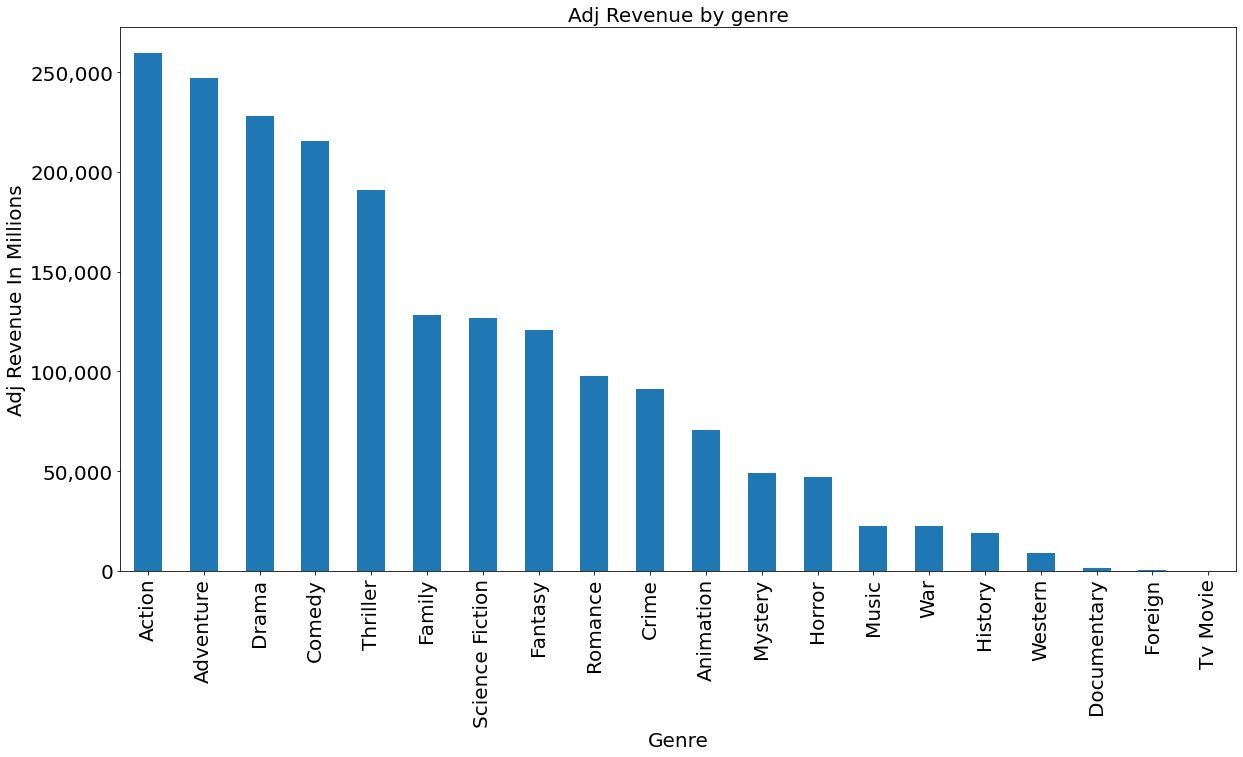

In [16]:
#Grouping the genres and summing
md_genres_plot_s1 = md_genres.groupby('genres')['revenue_adj'].sum().sort_values(ascending=False).head(20)
#converting the numbers to millions
md_genres_plot_s1 = md_genres_plot_s1.divide(other = 1000000)
#creating the plot
md_genres_plot1 = md_genres_plot_s1.plot.bar(figsize=(20, 10), fontsize=20)
plt.title('Adj Revenue by genre', fontsize=20)
plt.xlabel('Genre', fontsize=20)
md_genres_plot1.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) #formatting axis
plt.ylabel('Adj Revenue In Millions', fontsize=20)

Action, Adventure, Drama Comedy and Thriller movies bring the most revenue.
And seems like action movies are the most profitable.

### Lets find out revenue for movies by top 20 actor.

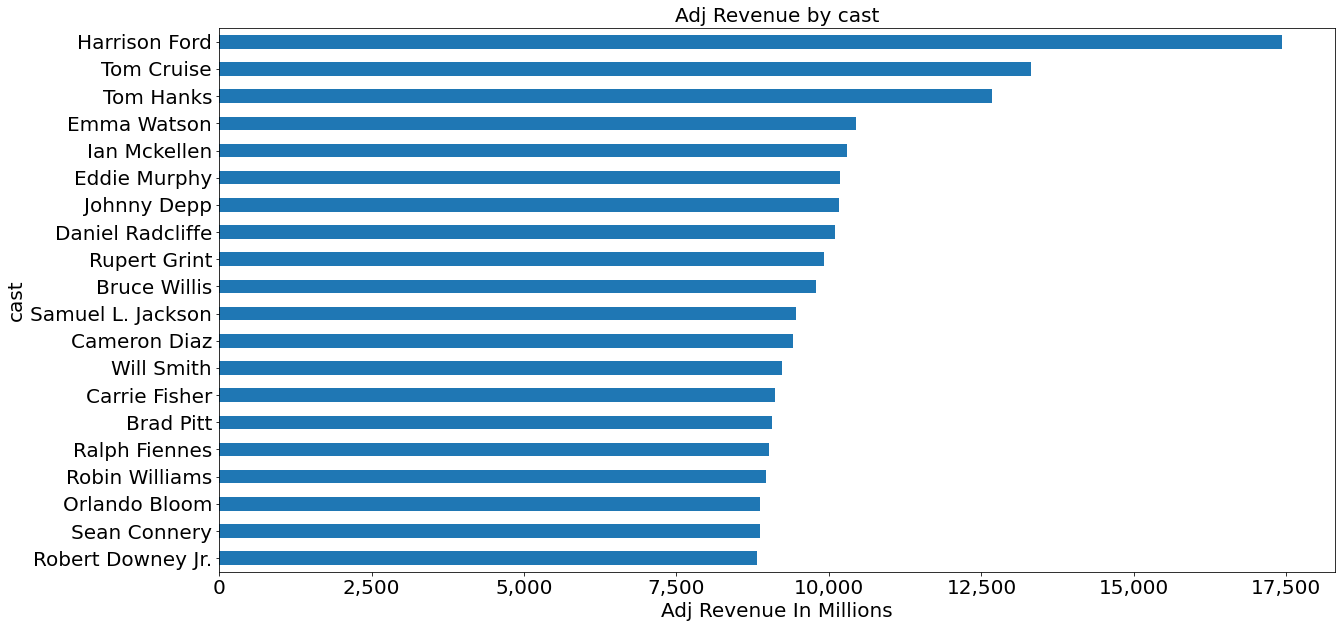

In [17]:
#Grouping the cast and summing
md_cast_plot_s1 = md_cast.groupby('cast')['revenue_adj'].sum().sort_values(ascending=False).head(20)
#converting the numbers to millions
md_cast_plot_s1 = md_cast_plot_s1.divide(other = 1000000)
#creating the plot
md_cast_plot1 = md_cast_plot_s1.plot.barh(figsize=(20, 10), fontsize=20)
plt.title('Adj Revenue by cast', fontsize=20)
plt.ylabel('cast', fontsize=20)
plt.xlabel('Adj Revenue In Millions', fontsize=20)
md_cast_plot1.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
md_cast_plot1 = md_cast_plot1.invert_yaxis() #inverting the axis to the highest is at the top.

As found in the previous chart, the top two actors are well known action actors.

As expected, the list is dominated by actors and actresses whom most movies are in the top five genres.

### Lets find top 10 movies by profit.

Text(0, 0.5, 'Adj Revenue In Millions')

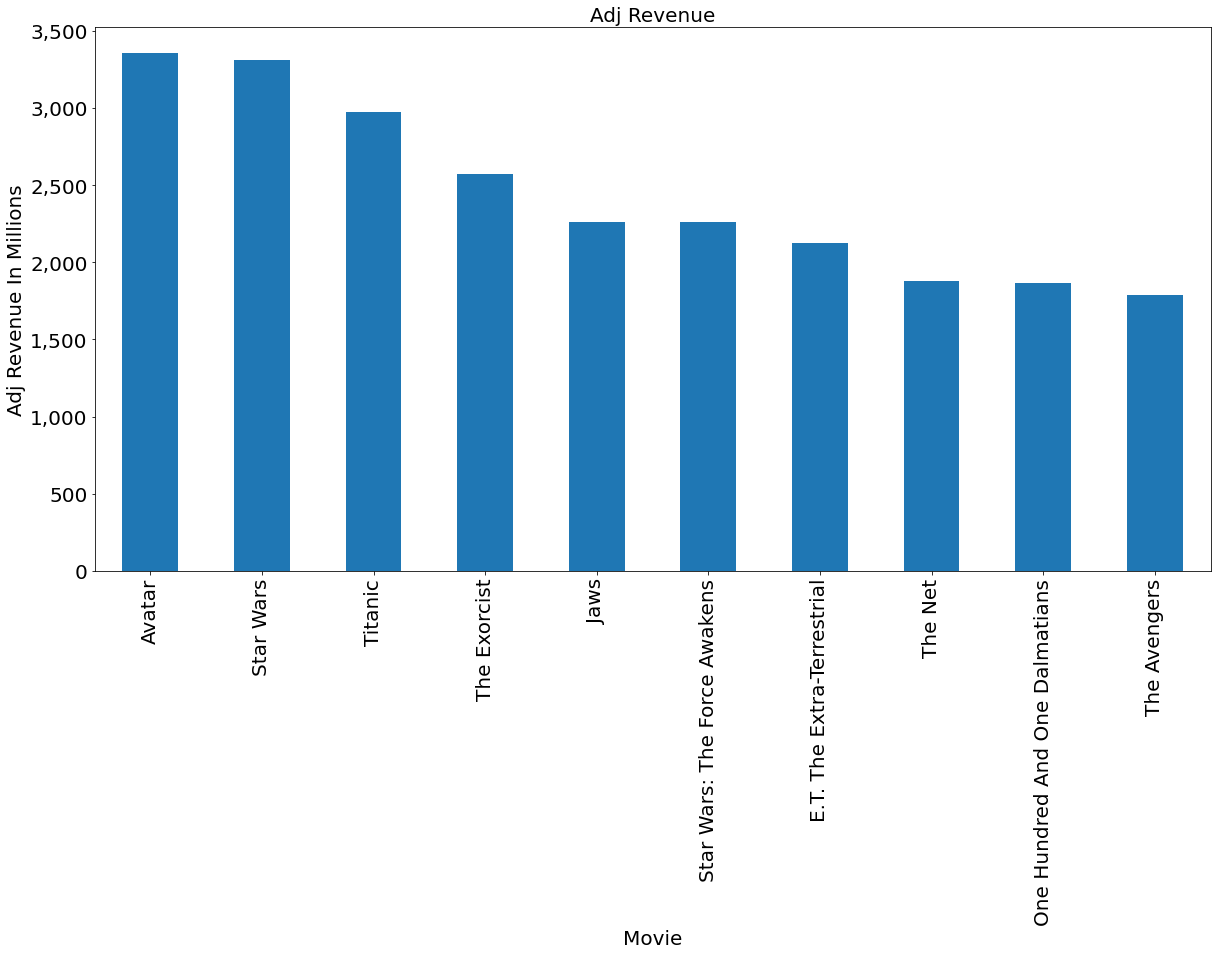

In [18]:
#converting to series of title and revenue
md_movies_plot1_s1 = md.groupby('original_title')['revenue_adj'].sum().sort_values(ascending=False).head(10)
#converting the numbers to millions
md_movies_plot1_s1 = md_movies_plot1_s1.divide(other = 1000000)
#creating the plot
md_movies_plot1 = md_movies_plot1_s1.plot.bar(figsize=(20, 10), fontsize=20)
plt.title('Adj Revenue', fontsize=20)
plt.xlabel('Movie', fontsize=20)
md_movies_plot1.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('Adj Revenue In Millions', fontsize=20)

Action and Adventure movies dominate the top movies as expect.

### Comparing Adjusted revenue to adjusted budget for top 10 movies.

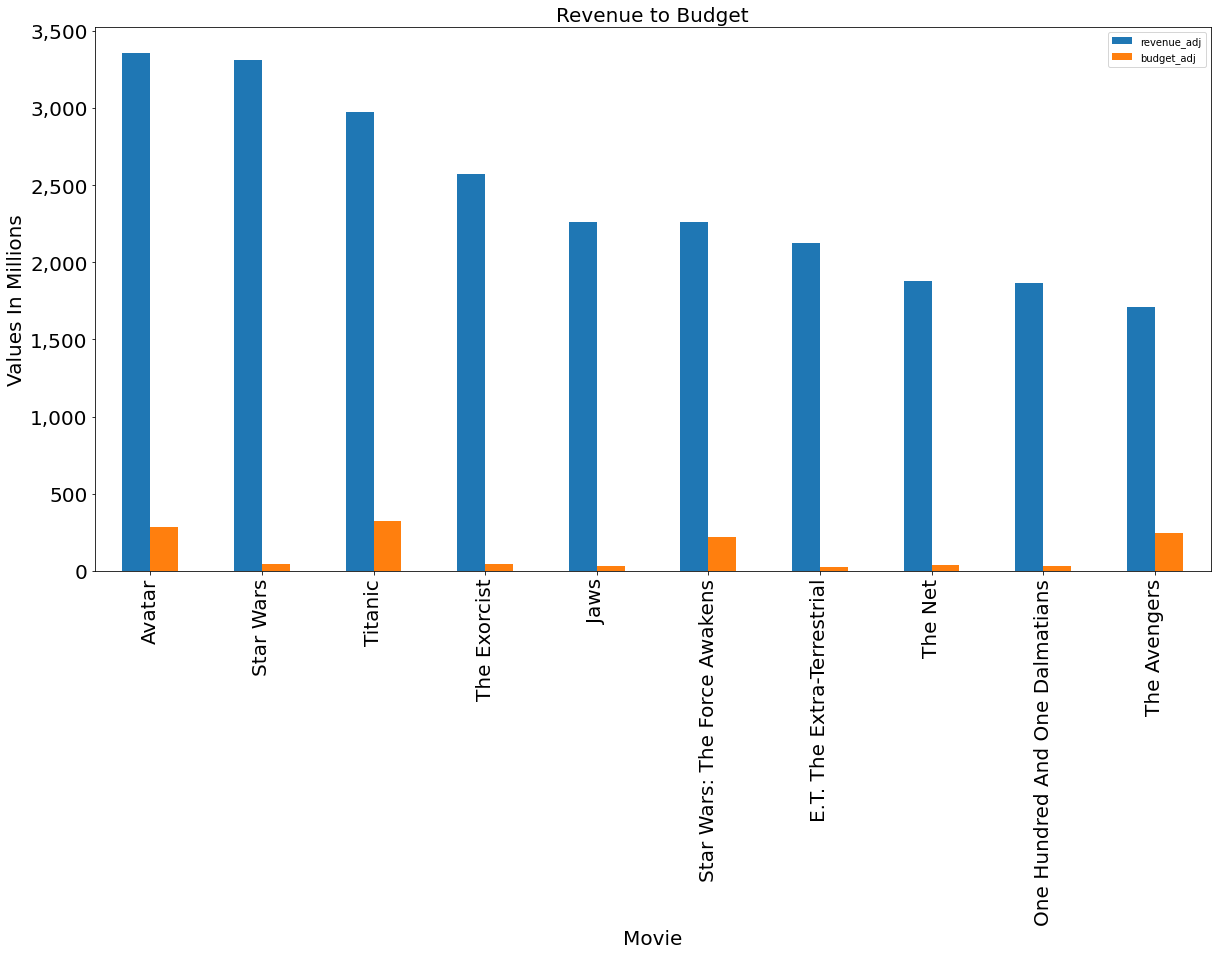

In [19]:
#filtering to the needed fields
md_movies_plot2 = md.filter(items=['original_title', 'revenue_adj', 'budget_adj']).sort_values(by='revenue_adj', ascending=False).head(10)
#converting the numbers to millions
md_movies_plot2 = md_movies_plot2.assign(revenue_adj=md_movies_plot2['revenue_adj'].astype(float)/1000000).round(2)
md_movies_plot2 = md_movies_plot2.assign(budget_adj=md_movies_plot2['budget_adj'].astype(float)/1000000).round(2)
#creating the plot
md_movies_plot2_p = md_movies_plot2.plot.bar(x='original_title', figsize=(20, 10), fontsize=20)
plt.title('Revenue to Budget', fontsize=20)
plt.xlabel('Movie', fontsize=20)
plt.ylabel('Values In Millions', fontsize=20)
md_movies_plot2_p.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))


We can see amazing performance by the top five movies.

It is to be said that most of these movies have been pioneers for their genres in their time, e.g:\
Avatar which had amazing VFX effects which amazed the audience.\
Star Wars and Jaws in the 70s which popularized CGI.\
The Avengers which caused superhero and comic movies become mainstream.



### Time series analysis

#### Preparing the date

In [20]:
#Creating a dataframe of just the needed columns
md_time01 = md.filter(items=['release_year', 'revenue_adj', 'budget_adj']).sort_values(by='revenue_adj', ascending=False)
#removing rows that have missing data and zero data points.
#md_time01 = md_time01[(md_time01[['revenue_adj','budget_adj']] != 0).all(axis=1)] # Works too
#md_time01 = md_time01[md_time01 > 0].dropna()

#md_time_test = md_time01 # was used for testing changes in count


In [21]:
#adding a count column to get how many movies in each year, just for testing 
md_time01['count'] = md_time01.groupby('release_year')['release_year'].transform('count')

#creating the new data frame and converting the values to millions
#converting to average to make up for the uncomplete data, keeping count for reference
md_time01 = md_time01.groupby(['release_year']).agg({'revenue_adj':'sum','budget_adj':'sum', 'count':'max'}) #could also use mean instead without count.
md_time01['revenue_adj']= md_time01['revenue_adj'].div(1000000)
md_time01['budget_adj']= md_time01['budget_adj'].div(1000000)

md_time01

#as we can see, we're missing a lot of data due to using adjusted rates.



revenue_adj  budget_adj  count
release_year                                
1960              1267.87      192.86     32
1961              2923.27      399.36     31
1962              1847.50      468.96     32
1963              1585.05      620.23     34
1964              2846.77      329.63     42
1965              3763.70      576.82     35
1966               676.88      459.75     46
1967              5717.36      779.94     38
1968              1968.85      535.02     38
1969              1720.40      297.10     30
1970              3736.90      846.89     40
1971              2587.54      485.65     55
1972              3063.20      224.63     40
1973              7134.68      380.00     55
1974              4265.60      404.07     46
1975              4606.11      270.74     44
1976              3643.39      555.60     47
1977              9312.85      690.08     56
1978              5437.33      829.61     65
1979              6006.11      908.38     57
1980              5555.21     1138.58     78
1981              5052.67     1064.17     82
1982              6593.50     1174.16     81
1983              5996.12     1348.90     80
1984              6564.99     1816.44    104
1985              6917.11     1800.90    108
1986              7090.80     1663.70    120
1987              7887.60     1616.33    124
1988              8179.92     2018.96    142
1989             10780.15     2253.44    135
1990             10525.05     2554.29    132
1991              8943.61     2786.18    133
1992             11212.35     2652.24    132
1993             12457.23     3187.46    177
1994             12391.20     3893.00    184
1995             15549.62     4866.94    174
1996             13710.04     6081.88    203
1997             17181.78     7661.27    191
1998             15073.24     7144.55    210
1999             17640.96     8956.22    224
2000             16500.63     8646.12    224
2001             19597.27     8245.04    241
2002             21066.85     8475.94    264
2003             21293.17     8776.87    281
2004             23009.14     9824.05    307
2005             21888.06     9731.30    361
2006             20894.55     9376.62    404
2007             24230.27     9522.22    432
2008             23345.19     9348.48    486
2009             26757.49    10363.72    525
2010             26064.36    11138.00    476
2011             27263.75    10376.13    532
2012             27769.96     9324.19    574
2013             27445.29    10255.52    649
2014             26598.32     8662.72    682
2015             29223.29     8295.06    617

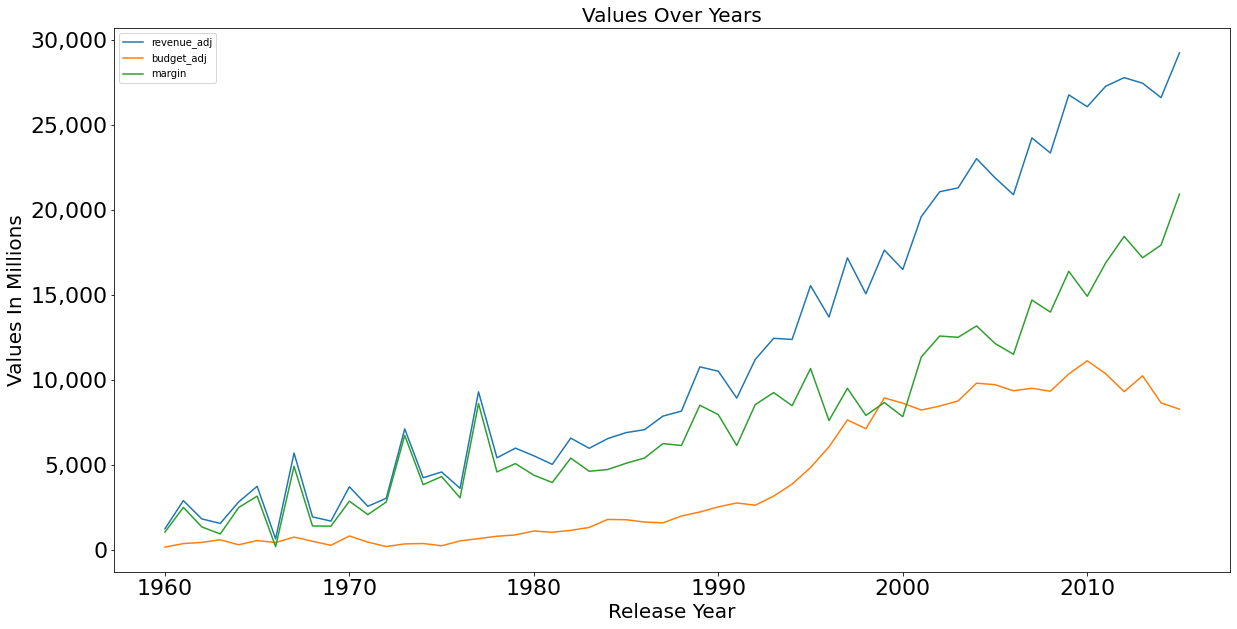

In [22]:
md_time01['margin'] = (md_time01['revenue_adj']-md_time01['budget_adj'])

md_time01['margin/count'] = (md_time01['margin']/md_time01['count']) #could use mean instead, but using this since I already have the count.

md_time01_plot = md_time01.reset_index().plot(y = ['revenue_adj', 'budget_adj', 'margin'], x = 'release_year', figsize=(20, 10), fontsize=22)
plt.title('Values Over Years', fontsize=20)
plt.xlabel('Release Year', fontsize=20)
plt.ylabel('Values In Millions', fontsize=20)
md_time01_plot.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

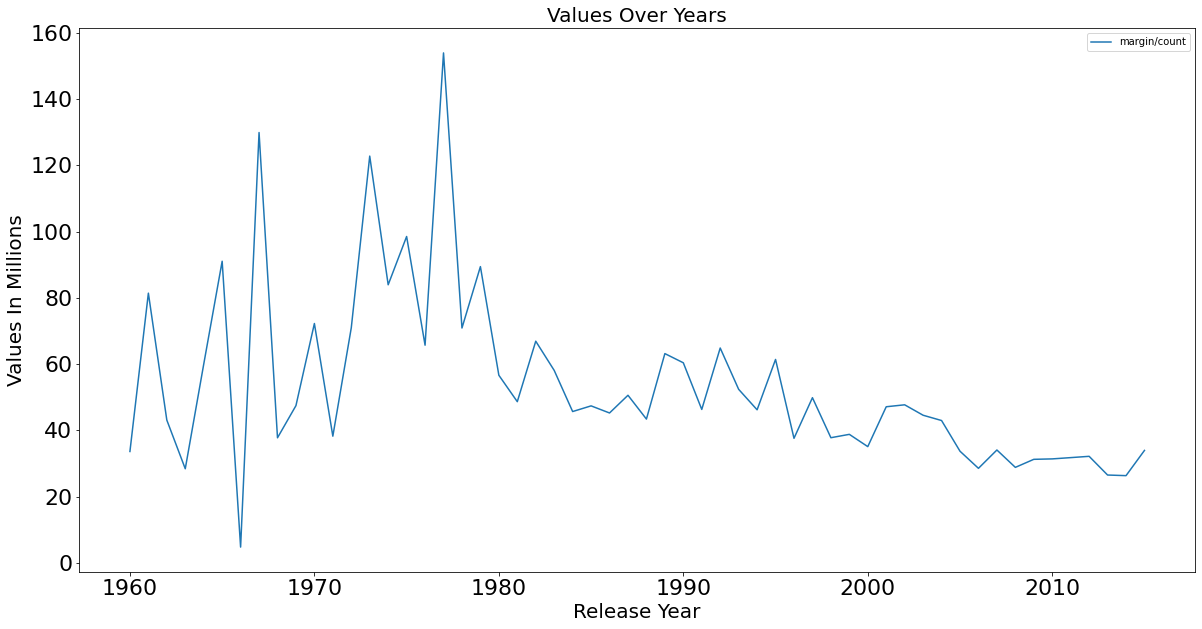

In [23]:
md_time01_plot = md_time01.reset_index().plot(y = 'margin/count', x = 'release_year', figsize=(20, 10), fontsize=22)
plt.title('Values Over Years', fontsize=20)
plt.xlabel('Release Year', fontsize=20)
plt.ylabel('Values In Millions', fontsize=20)
md_time01_plot.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

We can see the changes in the profitability margins declining over time, that is most likely caused by the having more movies in later years, which is both related to more movies are being made today and the dateset probably doesn't have all the old movies.

We can also see a HUGE dip in profitability in the  60s, that is most likely caused by Televisions becoming more affordable.

We also see big hike in the profitability in the second part of the 60s up to mid 80s, that is because of the great movies made in that period (like The God Father and The Exorcist).\
this is also partially caused by the technological advancement in CGI, movies like Star Wars, Jaws and E.T, which shook the whole industry and popularized the usage of CGI in later movies and Science Fiction movies and series.

We will confirm this in our next graphs.

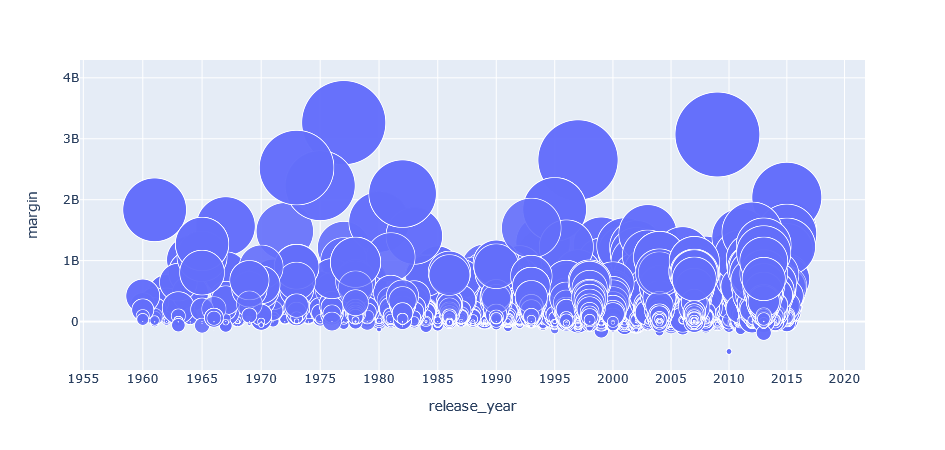

In [24]:
md_genres['margin'] = (md_genres['revenue_adj']-md_genres['budget_adj'])

fig = px.scatter(md_genres, x="release_year", y="margin", size="revenue_adj", hover_name="original_title", log_x=True, size_max=60)#, color="genres")
#removed colors for more clear picture since each movie have several genres, also faster performance.


fig.show()


We can see how the the 1960s to 1980s was a very good period for the film industry, and the great performance Avatar.

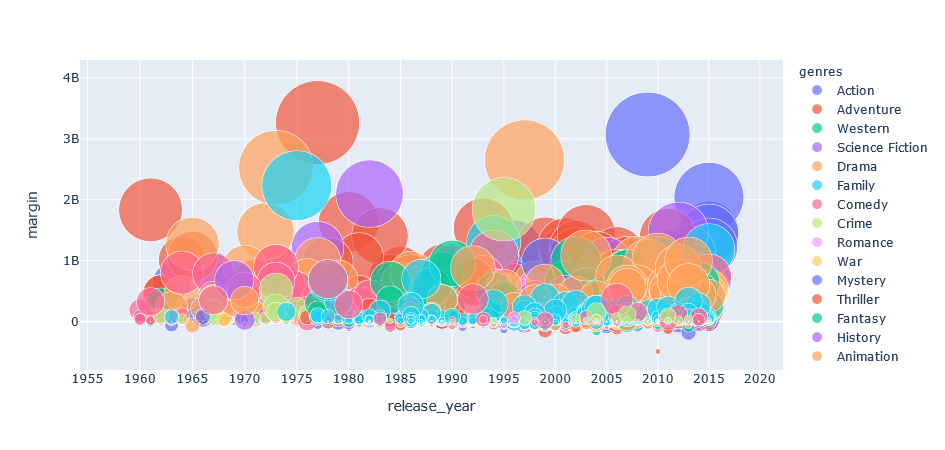

In [25]:
#Cleaning up duplicate movie titles to only keep the first genre to boost performance and get the expected results.
#without doing this, you will see color for the movie that doesn't allign with its legend's label.
md_genres3 = md_genres.drop_duplicates(subset="original_title")

fig = px.scatter(md_genres3, x="release_year", y="margin", size="revenue_adj", color="genres", hover_name="original_title", log_x=True, size_max=60)
fig.show()


In this graph we can clearly see how popular Action and Adventure movies are.

Keeping in mind this isn't the most accurate representation of the genres, for example The Exorcist is counted as drama and Star wars as Adventure.\
The most likely reason for this is that genres are skewed toward alphabetical order.

<a id='conclusions'></a>
## Conclusions

Findings:\
Actions, Adventure, Drama, Comedy and Thriller are the most dominant genres.\
The late 60s- Mid 80s was the best period for the movie industry.\
More movies are getting made today.\
Technology advancement has big effect on the industry, as seen in the affordability of TVs negatively affecting it in the 60s and-\
Positively affecting it with CGI in the 70s and 80s and Avatar with the improvement of CGI and 3D technology.


Mohamed Amr.